In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder  # Change this import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split

# Show all columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import the data
df = pd.read_csv('diabetes_prediction_dataset.csv')
count_0 = df['diabetes'].value_counts()[0]
count_1 = df['diabetes'].value_counts()[1]

# Randomly sample rows with 'diabetes' value 0 to match the count of 1s
if count_0 > count_1:
    df = pd.concat([df[df['diabetes'] == 0].sample(n=count_1, random_state=42), df[df['diabetes'] == 1]])
elif count_1 > count_0:
    df = pd.concat([df[df['diabetes'] == 1].sample(n=count_0, random_state=42), df[df['diabetes'] == 0]])

# Shuffle the DataFrame to mix the rows
df = df.sample(frac=1, random_state=42)

# df = df.drop(df.columns[-1], axis=1)

label_encoder = LabelEncoder()
df['gender_encoded'] = label_encoder.fit_transform(df['gender'])
df['smoking_history_encoded'] = label_encoder.fit_transform(df['smoking_history'])

df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
28431,Male,80.0,1,0,former,27.32,8.2,140,1,1,3
3627,Female,35.0,0,0,No Info,27.32,4.5,158,0,0,0
20708,Female,55.0,1,0,never,27.32,8.8,220,1,0,4
23220,Male,68.0,0,0,former,28.19,3.5,100,0,1,3
6445,Female,26.0,0,0,not current,21.38,5.8,155,0,0,5


C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\diren\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


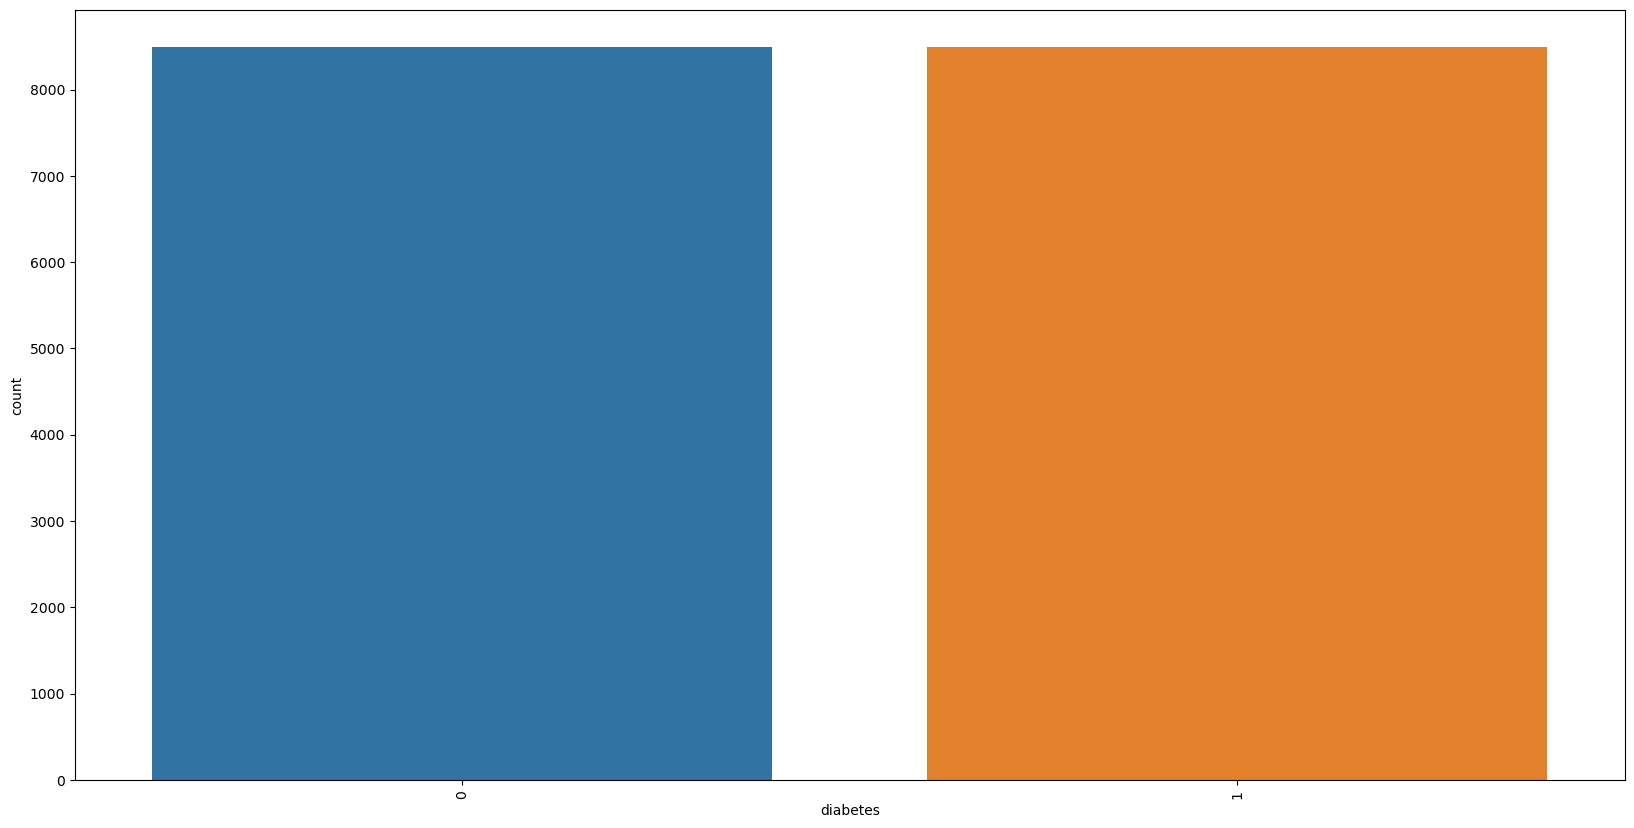

In [4]:
plt.figure(figsize=(20, 10))
sns.countplot(data=df, x='diabetes')
plt.xticks(rotation=90)
plt.show()


In [5]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.corr()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_encoded,smoking_history_encoded
age,1.000000,0.247884,0.251844,0.259158,0.282732,0.267106,0.479512,0.008643,0.225550
hypertension,0.247884,1.000000,0.100419,0.155013,0.161501,0.140702,0.262691,0.008917,0.111725
heart_disease,0.251844,0.100419,1.000000,0.049290,0.132821,0.115456,0.214170,0.090820,0.029429
bmi,0.259158,0.155013,0.049290,1.000000,0.203311,0.187918,0.346435,-0.032572,0.171721
HbA1c_level,0.282732,0.161501,0.132821,0.203311,1.000000,0.324006,0.600681,0.043929,0.108488
blood_glucose_level,0.267106,0.140702,0.115456,0.187918,0.324006,1.000000,0.541595,0.040279,0.093181
diabetes,0.479512,0.262691,0.214170,0.346435,0.600681,0.541595,1.000000,0.066891,0.179360
gender_encoded,0.008643,0.008917,0.090820,-0.032572,0.043929,0.040279,0.066891,1.000000,-0.056986
smoking_history_encoded,0.225550,0.111725,0.029429,0.171721,0.108488,0.093181,0.179360,-0.056986,1.000000


In [8]:
# Split data into test and train
train, test = train_test_split(df, test_size=0.3, random_state=42)


# Split data into X and y

X_train = train[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_encoded', 'smoking_history_encoded']]
y_train = train['diabetes']

X_test = test[['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_encoded', 'smoking_history_encoded']]
y_test = test['diabetes']

In [9]:
#model = Sequential(
#    [
#        Dense(32, input_shape=(X_train.shape[1],), activation='relu'),
#        Dense(32, activation="relu"),
#        Dense(1, activation="sigmoid"),
#    ]
#)
#
#model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'AUC', 'MeanSquaredError'])

In [12]:
# load model
from tensorflow.keras.models import load_model
model = load_model('diabetes_model_1500.keras')

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', 'AUC', 'MeanSquaredError'])

In [21]:
history = model.fit(
    X_train,
    y_train,
    epochs=500,
    batch_size=128,
    validation_data=(X_test, y_test),
)

Epoch 1/500
93/93 [==============================] - 6s 32ms/step - loss: 0.2055 - accuracy: 0.8997 - auc: 0.9725 - mean_squared_error: 0.0673 - val_loss: 0.2117 - val_accuracy: 0.8943 - val_auc: 0.9735 - val_mean_squared_error: 0.0702
Epoch 2/500
93/93 [==============================] - 1s 8ms/step - loss: 0.1984 - accuracy: 0.9062 - auc: 0.9747 - mean_squared_error: 0.0646 - val_loss: 0.2007 - val_accuracy: 0.8994 - val_auc: 0.9736 - val_mean_squared_error: 0.0661
Epoch 3/500
93/93 [==============================] - 1s 11ms/step - loss: 0.1993 - accuracy: 0.9028 - auc: 0.9743 - mean_squared_error: 0.0649 - val_loss: 0.2005 - val_accuracy: 0.9024 - val_auc: 0.9738 - val_mean_squared_error: 0.0661
Epoch 4/500
93/93 [==============================] - 1s 10ms/step - loss: 0.2051 - accuracy: 0.9019 - auc: 0.9730 - mean_squared_error: 0.0668 - val_loss: 0.2043 - val_accuracy: 0.8996 - val_auc: 0.9733 - val_mean_squared_error: 0.0676
Epoch 5/500
93/93 [==============================] - 1s 1

160/160 [==============================] - 2s 9ms/step - loss: 0.1852 - accuracy: 0.9047 - auc: 0.9775 - mean_squared_error: 0.0612


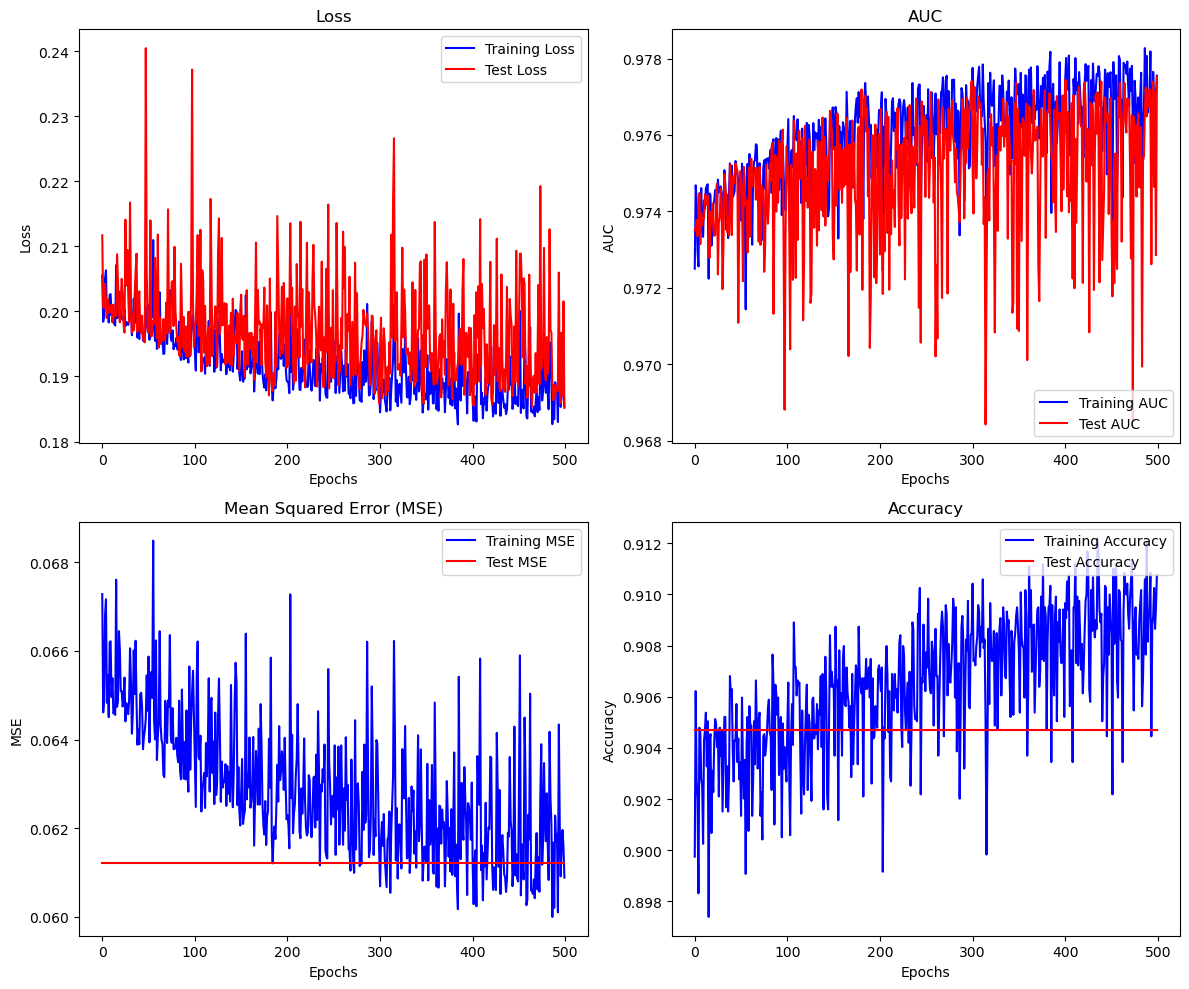

Test Loss: 0.1851700246334076


In [25]:
test_loss, test_accuracy, test_auc, test_mean_squared_error = model.evaluate(X_test, y_test)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plot Training and Test Loss
axes[0, 0].plot(history.history["loss"], label='Training Loss', color='b')
axes[0, 0].plot(history.history["val_loss"], label='Test Loss', color='r')
axes[0, 0].set_title('Loss')
axes[0, 0].set_xlabel('Epochs')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].legend(loc='upper right')

# Plot Training and Test AUC
axes[0, 1].plot(history.history["auc"], label='Training AUC', color='b')
axes[0, 1].plot(history.history["val_auc"], label='Test AUC', color='r')
axes[0, 1].set_title('AUC')
axes[0, 1].set_xlabel('Epochs')
axes[0, 1].set_ylabel('AUC')
axes[0, 1].legend(loc='lower right')

# Plot Training and Test Mean Squared Error (MSE)
axes[1, 0].plot(history.history["mean_squared_error"], label='Training MSE', color='b')
axes[1, 0].plot([test_mean_squared_error] * len(history.history["mean_squared_error"]), label='Test MSE', color='r')
axes[1, 0].set_title('Mean Squared Error (MSE)')
axes[1, 0].set_xlabel('Epochs')
axes[1, 0].set_ylabel('MSE')
axes[1, 0].legend(loc='upper right')

# Plot Training and Test Accuracy
axes[1, 1].plot(history.history["accuracy"], label='Training Accuracy', color='b')
axes[1, 1].plot([test_accuracy] * len(history.history["accuracy"]), label='Test Accuracy', color='r')
axes[1, 1].set_title('Accuracy')
axes[1, 1].set_xlabel('Epochs')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()
print("Test Loss:", test_loss)

model.save("diabetes_model_1500.keras")


160/160 [==============================] - 1s 5ms/step
[[9.9999994e-01]
 [1.0000000e+00]
 [9.9999976e-01]
 ...
 [6.4055783e-01]
 [1.0000000e+00]
 [1.2059811e-04]]


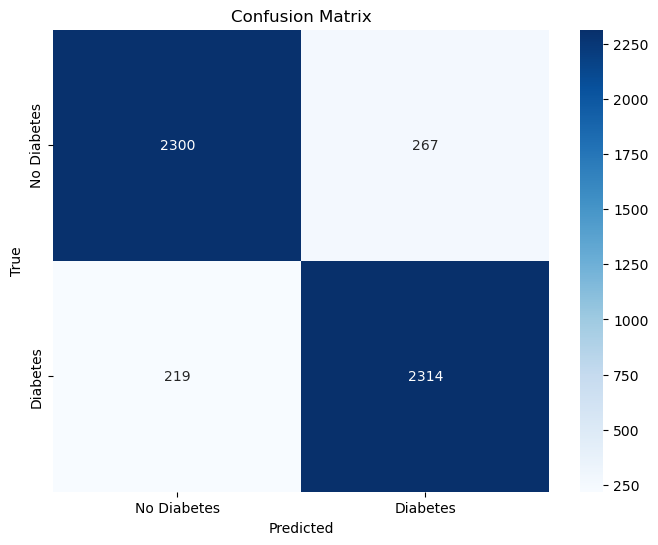

In [13]:
from sklearn.metrics import confusion_matrix

# Make predictions using your model on the test data
y_pred = model.predict(X_test)
print(y_pred)
y_pred = (y_pred > 0.5)  # Threshold predictions to convert probabilities to binary values (0 or 1)

# Calculate the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [18]:
#predict the first value of the dataset
print(model.predict(X_test[:1]))
print(y_test[:1])

1/1 [==============================] - 0s 69ms/step
[[0.99999994]]
94528    1
Name: diabetes, dtype: int64


In [23]:
import shap

shap.initjs()

explainer = shap.KernelExplainer(model, X_train.iloc[:50,:])
shap_values = explainer.shap_values(X_train.iloc[20,:], nsamples=500)

In [24]:
shap.force_plot(explainer.expected_value, shap_values[0], X_train.iloc[20,:])

In [25]:
shap_values50 = explainer.shap_values(X_train.iloc[50:100,:], nsamples=500)

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:07<00:00,  6.33it/s]


In [26]:
shap.force_plot(explainer.expected_value, shap_values50[0], X_train.iloc[50:100,:])

In [27]:
import bz2
import pickle

with bz2.BZ2File("explainer.bz2", "wb") as file:
    pickle.dump(explainer, file)